<a href="https://colab.research.google.com/github/Echevarriaj93/DATA6545-MLOPS/blob/main/Jose_Echevarria_Mini_project_2_MNIST_Analysis_pt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project #2: MNIST Analysis

An easy-to-follow scikit-learn tutorial that will help you to get started with the Python machine learning.

## Machine Learning with Python

Machine learning is a branch in computer science that studies the design of algorithms that can learn.

Typical tasks are concept learning, function learning or “predictive modeling”, clustering and finding predictive patterns. These tasks are learned through available data that were observed through experiences or instructions, for example.

The hope that comes with this discipline is that including the experience into its tasks will eventually improve the learning. But this improvement needs to happen in such a way that the learning itself becomes automatic so that humans like ourselves don’t need to interfere anymore is the ultimate goal.

Today’s scikit-learn tutorial will introduce you to the basics of Python machine learning:

- Part 1: You'll learn how to use Python and its libraries to explore your data with the help of matplotlib and Principal Component Analysis (PCA),
- Part 2a: And you'll preprocess your data with normalization and you'll split your data into training and test sets.
- Part 2b: Next, you'll work with the well-known KMeans algorithm to construct an unsupervised model, fit this model to your data, predict values, and validate the model that you have built.
- Part 3: As an extra, you'll also see how you can also use Support Vector Machines (SVM) to construct another model to classify your data.

Let's move to part 3 now.

## Support Vector Machine Classification

When you recapped all of the information that you gathered out of the data exploration, you saw that you could build a model to predict which group a digit belongs to without you knowing the labels. And indeed, you just used the training data and not the target values to build your KMeans model.

### Read-in Data

For starters, let's import the `digits` dataset again.

In [1]:
# import `datasets` from `sklearn`.
from sklearn.datasets import load_digits

# read `digits` using `load_digits()` into a variable called `digits`
digits = load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

### Split the data and Specify the Model

Then let's pick it up from the case where you use both the `digits` training data and the corresponding `target` values to build your model.

If you follow the algorithm map, you’ll see that the first model that you meet is the linear SVC - SVC stands for Support Vector Classifier. Let’s apply this now to the `digits` data:

In [2]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Split the data into training and test sets 
X = digits.data
y = digits.target
# Split `data` into `X_train` and `X_test`
# Split `target` into `y_train` and `y_test`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=2019)


# Split `images` into `images_train` and `images_test`

# use `test_size` of 0.25 and `random_state` as 2019
# if you have any doubts about this, please refer to part 2 of this project
images_train, images_test = train_test_split(digits.images, test_size = .25, random_state=2019)

# Import the `svm` model from `sklearn`
from sklearn import svm

# Create the SVC model by calling `svm.SVC()`
# the SVC model has a series of hyper-parameters
# for now, we are going to use the basics of the hyperparameters as follows
# set `gamma` to 0.001 - `gamma` typically ranges from [0.001, 0.01]
# set `C` to 100. , and then set `kernel` to 'linear'
# name the model as `svc_model`
svc_model = svm.SVC(gamma=0.001, C=100, kernel='linear')

# Fit the data to the SVC model
# since this is supervised learning, you need to `fit` both `X_train` and `y_train` to it
svc_model.fit(X_train, y_train)

SVC(C=100, gamma=0.001, kernel='linear')

### Model Evaluation and Optimization

You see here that you make use of `X_train` and `y_train` to fit the data to the `svc_model`. This is clearly different from clustering we did in part 2. Note also that in this example, you set the value of `gamma` manually. It is possible to automatically find good values for the parameters by using tools such as __grid search__ in combination with __cross validation__.

Even though this is not the focus of this tutorial, you will see how you could have gone about this if you would have made use of grid search to adjust your parameters. You would have done something like the following:

In [3]:
# Split the `digits` data into two equal sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(digits.data, digits.target, test_size=0.5, random_state=123)

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf', 'sigmoid', 'poly']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train1, y_train1)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.9888764742396028
Best `C`: 1
Best kernel: rbf
Best `gamma`: 0.001


We will have a separate lecture on __hyperparameter optimization__ later in this class.

Next, you use the classifier with the classifier and parameter candidates that you have just created to apply it to the __test part__ of your data set. You will also train a new classifier using the best parameters found by the grid search. You record the result to see if the best parameters that were found in the grid search are actually working by outperforming the initial model we created (`svc_model`).

In [4]:
# Apply the classifier to the test data, and view the accuracy score
print(svc_model.score(X_test, y_test))

# Train and score a new classifier with the grid search parameters
print(svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test))

0.9822222222222222
0.9866666666666667


The parameters indeed work well!

Now what does this new knowledge tell you about the SVC classifier that you had modeled before you had done the grid search?

Let’s back up to the model that you had made before.

You see that in the SVM classifier, the penalty parameter `C` of the error term is specified at `100.`. Lastly, you see that the `kernel` has been explicitly specified as a `linear` one. The `kernel=` argument specifies the kernel type that you’re going to use in the algorithm and by default, this is `rbf`. In other cases, you can specify others such as `linear`, `poly`, …

But what is a kernel exactly?

A kernel is a similarity function, which is used to compute __similarity__ between the  __data points in the training set__. When you provide a kernel to an algorithm, together with the training data and the labels, you will get a classifier, as is the case here. You apply a trained model by assigning new unseen objects to it and let it classify them into predefined classes. For the SVM, you will typicall try to linearly divide your data points.

However, the grid search tells you that an `rbf` kernel would’ve worked better. The penalty parameter and the gamma were also specified correctly.

For now, let’s just say you just continue with a `linear` kernel and predict the values for the test set (`X_test`) and then comparing the predictive results with the original labels (`y_test`):

In [5]:
# Predict the label of `X_test` using `.predict()`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test)

[9 9 2 9 6 6 5 2 4 1 9 3 1 5 1 6 9 7 5 7 3 6 7 0 5 8 1 5 6 4 7 6 7 6 4 9 8
 1 5 8 9 1 7 0 4 9 0 3 5 9 3 7 4 0 8 8 3 6 7 5 5 0 3 2 4 3 2 6 8 3 3 8 6 6
 3 0 5 2 5 0 7 5 0 1 3 5 6 3 3 7 0 3 6 8 5 8 3 9 6 7 7 4 7 9 1 9 6 4 6 8 8
 1 2 4 0 0 1 7 0 3 0 6 3 7 2 4 5 5 2 0 0 1 0 4 3 8 8 3 2 8 5 2 8 4 7 4 8 7
 3 2 9 6 1 3 6 2 6 7 8 5 3 8 2 1 3 0 1 1 2 4 6 9 3 6 1 3 6 9 6 4 8 2 9 9 5
 9 2 7 6 7 2 7 4 5 1 5 6 8 3 3 9 7 6 6 5 0 9 5 3 4 9 8 5 3 8 3 6 2 5 6 4 4
 8 2 3 3 8 2 9 8 1 4 3 8 3 0 0 0 7 1 5 5 9 7 0 2 6 1 8 7 0 4 6 1 0 5 4 8 0
 6 4 3 8 1 4 8 9 6 1 0 7 7 6 1 7 7 2 8 7 9 2 1 7 6 4 5 0 0 9 3 5 5 2 8 0 9
 7 3 1 3 9 6 6 1 5 0 1 3 1 0 2 8 0 1 7 4 9 1 1 1 7 3 4 2 5 6 3 4 5 5 5 5 2
 2 8 9 2 2 1 9 6 2 8 0 1 1 4 4 2 1 4 7 5 7 9 4 2 6 0 9 4 8 9 8 0 8 1 2 9 2
 1 4 8 2 1 6 0 7 3 2 3 3 8 2 8 5 9 7 8 9 3 0 7 6 4 5 5 6 9 6 1 2 3 4 6 9 0
 2 3 9 7 0 8 5 3 0 7 0 0 7 9 4 0 7 8 3 9 0 4 0 5 7 3 5 1 5 3 7 9 9 4 0 9 2
 5 4 0 2 5 6]
[5 9 2 9 6 6 5 2 4 1 5 3 1 5 1 6 9 7 5 7 3 6 7 0 5 8 1 5 6 4 7 6 3 6 4 9 8
 1 5 8 9 1 

Readability of the result comparison is not very high, correct? Maybe visualizations, as they _always help improving readability_ of your data, would help?

Let's try that!

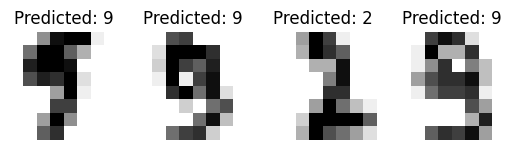

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Assign the predicted values of `X_test` to `y_pred` using `.predict()`
y_pred = svc_model.predict(X_test)

# Zip together the `images_test` and `y_pred` values in `images_and_predictions`
# Remember ot make the zipped result a list using list()
images_and_predictions = list(zip(images_test, y_pred))

# For the first 4 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    plt.subplot(1, 4, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

# Show the plot
plt.show()

Above plot is very similar to the plot that you made when we were doing the EDA in part 1 of this project. Only this time, you zip together the images and the __predicted values__ (instead of original labels) and you only take the first `4` elements of `images_and_predictions`.

And as humans, you have to admit that these images are not that easy to classify yourselves, agreed?

### More on Model Evaluation

But now the biggest question: how does this model perform? Even though you see the accuracy at `98%` a few code blocks above, remember that is for your __training data__ (we call them __training accuracies__). The training accuracy of your model can easily go up to `100%` since the training process is to improve the __training accuracy__ to the extent possible. But we do not evaluate the models on the __training accuracy__, instead we will use the __test accuracy__ when you apply your trained model on your __test data__.

__NOTE__: as a matter of fact, if your __training accuracy__ is too high, and your __test accuracy__ is much lower, you should check your model for __overfitting__. You do __NOT__ want an overfitted model! That's why sometimes we split the data into _training, testing, and validation_ sets.

Let's now check how our model actually performed on the __test set__.

In [9]:
# from `metrics` import `classification_report` and `confusion_matrix`
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report using comparison of `y_test` and `y_pred`
print(classification_report(y_test, y_pred))

# Print the confusion matrix using comparison of `y_test` and `y_pred`
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.98      1.00      0.99        41
           2       1.00      1.00      1.00        42
           3       1.00      0.98      0.99        52
           4       1.00      1.00      1.00        40
           5       0.98      0.96      0.97        48
           6       1.00      1.00      1.00        47
           7       0.93      1.00      0.97        42
           8       0.98      0.96      0.97        45
           9       0.96      0.93      0.95        46

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

[[47  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  1  0  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0

Remember we used the confusure matrix in part 2 when we evaluate the clustering results, right? We say that we want the higher values to be on the top-left to bottom-right diagonal line. 

You clearly see that this model performs a whole lot better than the clustering model that you used earlier.

You can also see it when you visualize the predicted and the actual labels with the help of `Isomap()`:

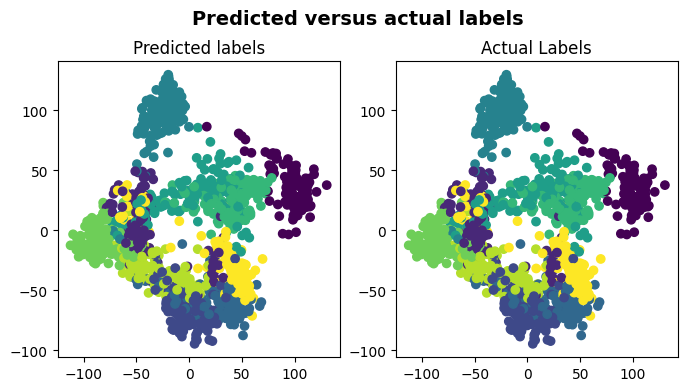

In [10]:
# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
predicted = svc_model.predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the layout
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Labels')


# Add title
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

You’ll see that this visualization confirms your classification report, which is very good news. :)

### Do It Yourself

Remember we used __grid search__ to get a set of 'best' hyperparameters of the model? Use these parameters to create another SVC model, and then train it with `X_train` and `y_train`, and apply it to `X_test` to evaluate its performance. 

In order to do that, you will nned to:
- specify a SVC model using `C=10, kernel='rbf', gamma=0.001` as hyperparameters, then `fit` the model to `X_train` and `y_train`;
- predict the labels by calling `.predict()` on `X_test`;
- visualize the original image and predicted labels;
- print out `confusion_matrix` and `classification_report`;
- use `Isomap()` to visualize the classification results.

Please write your code in the block below.

In [15]:
#### write your code here
svc_model_2 = svm.SVC(C=10, kernel='rbf', gamma=0.001)

svc_model_2.fit(X_train, y_train)

y_pred = svc_model_2.predict(X_test)

print(confusion_matrix(y_test, y_pred),'\n\n', classification_report(y_test, y_pred))


[[47  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  1  0  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  1  0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0  1  1 44]] 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.98      1.00      0.99        41
           2       1.00      1.00      1.00        42
           3       1.00      0.98      0.99        52
           4       1.00      1.00      1.00        40
           5       1.00      0.96      0.98        48
           6       1.00      1.00      1.00        47
           7       0.95      1.00      0.98        42
           8       0.98      0.98      0.98        45
           9       0.96      0.96      0.96        46

    accuracy                           0.99       450
   macro avg    

### Answer this question:

Observe the results, and compare the results to the ones we obtained using `svc_model`. Is there any difference? Provide your answer in the block below.

__There is a slight increase in accuracy with the newer model using 'rbf' overall. Some number like 5 and 7 are predicted better here__.

That's all for mini project 2. Please make sure your sync the complete notebook to your github repo for submission.